In [1]:
# Okay I'm just going to try to fill in the new runs and hope nothing breaks
# (something will break)

In [2]:
#This changes the default matplotlib math text because it's garbage
%pylab inline
import matplotlib as mpl
mpl.rcParams['mathtext.default'] = 'rm'
rc('text', usetex=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
#Packages I need
import numpy as np
import yt, h5py, re, os
from astropy.cosmology import FlatLambdaCDM, z_at_value
import astropy.units as u
import matplotlib.gridspec as gridspec
from random import sample
from andrew_tools.simple_tools import high_low_limit, anticumulative_hist
from mpl_toolkits.axes_grid1 import make_axes_locatable

601
601
[10.39568676] [6.89743444]
601
601


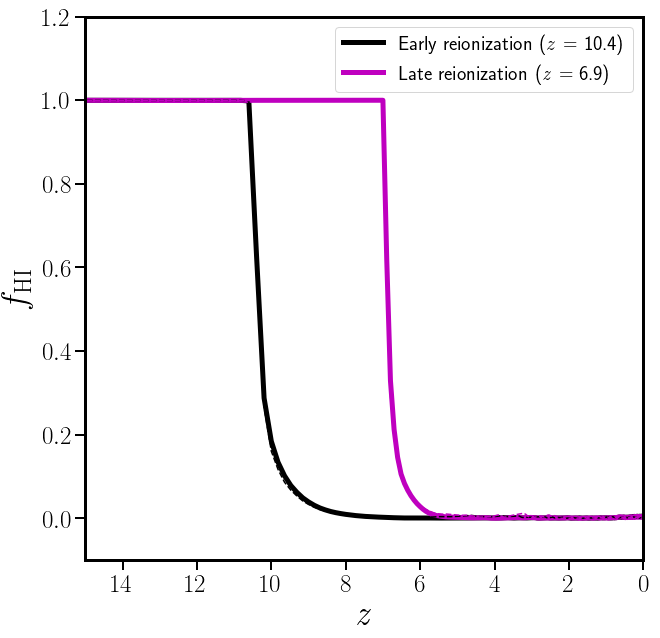

In [69]:
late_txt = np.loadtxt('../reruns/neutral_fraction_m10e_late.txt')
fid_txt = np.loadtxt('../reruns/neutral_fraction_m10e_fg.txt')

fig1 = plt.figure(1,(10,10))
plt.ylabel(r'$f_{\rm HI}$',fontsize=35)
plt.xlabel(r'$\it{z}$',fontsize=35)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)

print len(fid_txt[:,0])
print len(late_txt[:,0])

fid_50_diff = np.abs(fid_txt[:,2]-0.5)
reion_50_diff = np.abs(late_txt[:,2]-0.5)

z_reion_fg = fid_txt[:,0][(fid_50_diff==np.min(fid_50_diff))]
z_reion_late = late_txt[:,0][(reion_50_diff==np.min(reion_50_diff))]

print z_reion_fg, z_reion_late

plt.plot(fid_txt[:,0],fid_txt[:,2],color='k',linewidth=5,label=r'Early reionization ($z$ = 10.4)')
#plt.fill_between(fid_txt[:,0],)

plt.plot(late_txt[:,0],late_txt[:,2],color='m',linewidth=5,label=r'Late reionization ($\it{z}$ = 6.9)')

late_txt = np.loadtxt('../reruns/neutral_fraction_m10h_late.txt')
fid_txt = np.loadtxt('../reruns/neutral_fraction_m10h_fg.txt')

print len(fid_txt[:,0])
print len(late_txt[:,0])

plt.plot(fid_txt[:,0],fid_txt[:,2],color='k',linestyle='--')
plt.plot(late_txt[:,0],late_txt[:,2],color='m',linestyle='--')

plt.xlim([15.0,0.0])
plt.ylim([-0.1,1.2])

plt.legend(fontsize=20)
plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp


halo :m10e
fiducial run: 47, late run: 42, total cites: 7263,7170
halo :m10h
fiducial run: 24, late run: 24, total cites: 4805,4766
halo :m10a
fiducial run: 8, late run: 8, total cites: 2543,2493
14429 14429


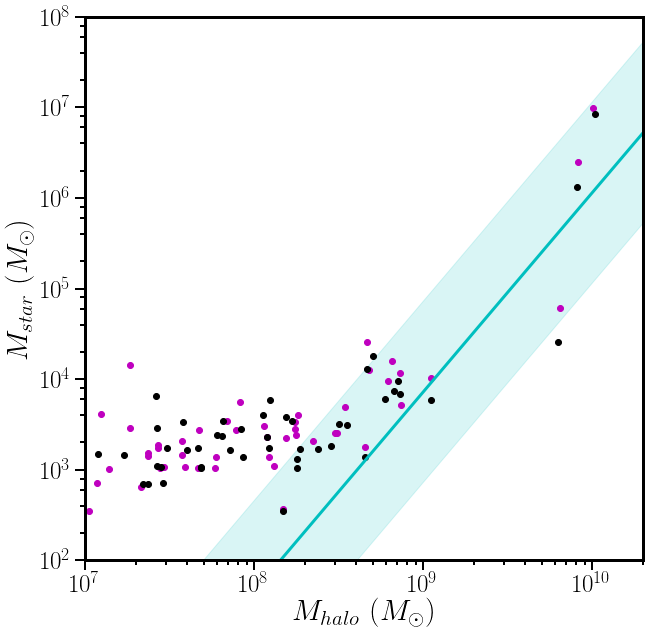

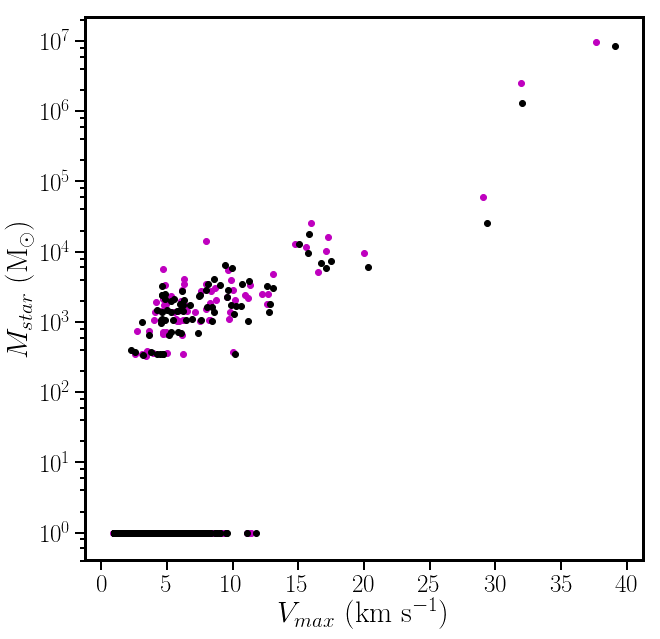

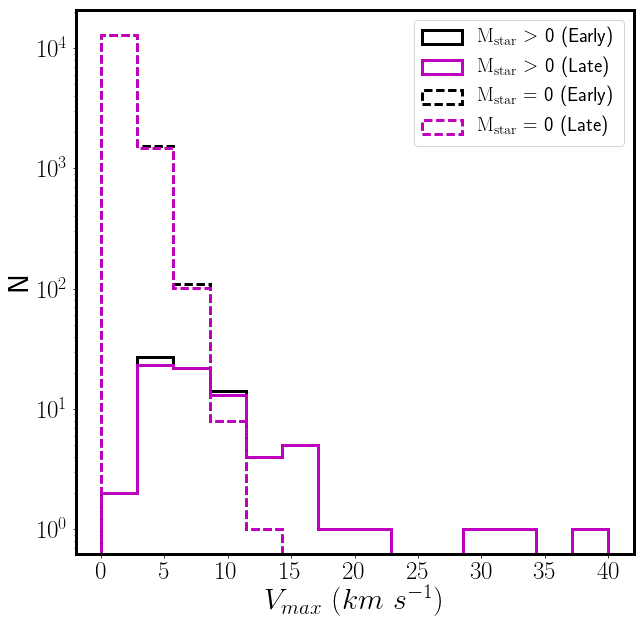

[ 2. 27. 22. 14.  4.  5.  1.  1.  0.  0.  1.  1.  0.  1.] [1.2867e+04 1.5470e+03 1.0900e+02 8.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00]
[ 2. 23. 22. 13.  4.  5.  1.  1.  0.  0.  1.  1.  0.  1.] [1.2765e+04 1.4790e+03 1.0200e+02 8.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00]


In [73]:
halo_list = ['m10e','m10h','m10a']

v_max_reion_plot, m_halo_reion_plot, m_star_reion_plot = [],[],[]
v_max_fid_plot, m_halo_fid_plot, m_star_fid_plot = [],[],[]

sigma = 1.0

ab_mhalo = np.logspace(7.0,12.0,40)

def ab_w_scatter(M_halo,M_one,delta,gamma,eps,a_one,a_two,scatter=0):
    def F_one(x):
        return -log10(10**(-a_one*x)+1.0)+delta*(log10(1.0+exp(x)))**gamma/(1.0+exp(10**(-x)))
    def F_two(x):
        return -log10(10**(-a_two*x)+1.0)+delta*(log10(1.0+exp(x)))**gamma/(1.0+exp(10**(-x)))
    if M_halo>=M_one:
        log_M_star = log10(eps*M_one)+F_one(log10(M_halo/M_one))-F_one(0)
    else:
        log_M_star = log10(eps*M_one)+F_two(log10(M_halo/M_one))-F_two(0)
    return log_M_star

ab_mstar = [10**ab_w_scatter(xx,10**11.514,3.508,0.316,10**(-1.777),1.412,2.2) for xx in ab_mhalo]
ab_mstar_scatter = [ab_w_scatter(xx,10**11.514,3.508,0.316,10**(-1.777),1.412,2.2) for xx in ab_mhalo]
ab_mstar_scatter_low = [10**(xx-sigma) for xx in ab_mstar_scatter]
ab_mstar_scatter_high = [10**(xx+sigma) for xx in ab_mstar_scatter]
ab_mstar_scatter_med = [10**(xx) for xx in ab_mstar_scatter]

for ii in range(len(halo_list)):
    
    f_reion = np.loadtxt('../reruns/late_fg_6/'+halo_list[ii]+'/ahf_'+halo_list[ii]+'_late.z0.000.AHF_halos')

    h = 0.71

    mass_reion = f_reion[:,3]/h
    x_reion = f_reion[:,6]/h
    y_reion = f_reion[:,7]/h
    z_reion = f_reion[:,8]/h
    mass_star_reion = f_reion[:,64]/h
    vmax_reion = f_reion[:,16]
    r_vir_reion = f_reion[:,11]/h
    f_hires_reion = f_reion[:,37]

    reion_mask = (f_hires_reion==1.0)
    reion_star_mask = (mass_star_reion>0.0)
    m_halo_reion = mass_reion[reion_mask]
    m_star_reion = mass_star_reion[reion_mask]
    
    V_max_reion = vmax_reion[reion_mask]

    m_star_reion_fix = [1.0 if xx==0.0 else xx for xx in m_star_reion]

    [m_star_reion_plot.append(xx) for xx in m_star_reion_fix]
    [m_halo_reion_plot.append(xx) for xx in m_halo_reion]
    [v_max_reion_plot.append(xx) for xx in V_max_reion]
    
    f_fid = np.loadtxt('../reruns/fg_reion/'+halo_list[ii]+'/ahf_'+halo_list[ii]+'_fg.z0.000.AHF_halos')

    mass_fid = f_fid[:,3]/h
    x_fid = f_fid[:,6]/h
    y_fid = f_fid[:,7]/h
    z_fid = f_fid[:,8]/h
    mass_star_fid = f_fid[:,64]/h
    vmax_fid = f_fid[:,16]
    r_vir_fid = f_fid[:,11]/h
    f_hires_fid = f_fid[:,37]

    fid_mask = (f_hires_fid==1.0)
    fid_star_mask = (mass_star_fid>0.0)
    m_halo_fid = mass_fid[fid_mask]
    m_star_fid = mass_star_fid[fid_mask]
    V_max_fid = vmax_fid[fid_mask]

    m_star_fid_fix = [1.0 if xx==0.0 else xx for xx in m_star_fid]

    [m_star_fid_plot.append(xx) for xx in m_star_fid_fix]
    [m_halo_fid_plot.append(xx) for xx in m_halo_fid]
    [v_max_fid_plot.append(xx) for xx in V_max_fid]
    
    print 'halo :{}'.format(halo_list[ii])
    print 'fiducial run: {}, late run: {}, total cites: {},{}'.format(len(mass_fid[fid_mask&fid_star_mask]),
                                                                      len(mass_reion[reion_mask&reion_star_mask]),
                                                                          len(mass_fid[fid_mask]),len(mass_reion[reion_mask]))
    
m_star_fid_plot = np.asarray(m_star_fid_plot)
v_max_fid_plot = np.asarray(v_max_fid_plot)
m_halo_fid_plot = np.asarray(m_halo_fid_plot)

m_star_reion_plot = np.asarray(m_star_reion_plot)
v_max_reion_plot = np.asarray(v_max_reion_plot)
m_halo_reion_plot = np.asarray(m_halo_reion_plot)
    
print len(m_halo_reion_plot), len(m_star_reion_plot)
plt.figure(1,(10,10))
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.xlabel('$M_{halo}$ $(M_{\odot})$',fontsize=30)
plt.ylabel('$M_{star}$ $(M_{\odot})$',fontsize=30)
plt.ylim([1.0e2,1.0e8])
plt.xlim([1.0e7,2.0e10])
plt.xscale('log')
plt.yscale('log')
plt.scatter(m_halo_reion_plot,m_star_reion_plot,color='m')
plt.scatter(m_halo_fid_plot,m_star_fid_plot,color='k')
plt.plot(ab_mhalo,ab_mstar_scatter_med,color='c',linewidth=3,zorder=1)
plt.fill_between(ab_mhalo,ab_mstar_scatter_low,ab_mstar_scatter_high,color='c',alpha=0.15,zorder=0)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)

plt.figure(2,(10,10))
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.xlabel(r'\rm $V_{max}$ $\rm (km$ $\rm s^{-1})$',fontsize=30)
plt.ylabel(r'\rm $M_{star}$ $\rm (M_{\odot})$',fontsize=30)
#plt.ylim([0.0,1.00])
#plt.xlim([0.0,13.7])
#plt.xscale('log')
plt.yscale('log')
plt.scatter(v_max_reion_plot,m_star_reion_plot,color='m')
plt.scatter(v_max_fid_plot,m_star_fid_plot,color='k')
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)

plt.figure(3,(10,10))
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.xlabel('$V_{max}$ $(km$ $s^{-1})$',fontsize=30)
plt.ylabel('N',fontsize=30)

plt.yscale('log')

v_max_bins = np.linspace(0.0,40.0,15)

fid_hist_fill, bins, patches = plt.hist(v_max_fid_plot[(m_star_fid_plot!=1.0)],bins=v_max_bins,color='k',histtype='step',linewidth=3,label=r'$\rm M_{star}$ $>$ 0 (Early)')
reion_hist_fill, bins, patches = plt.hist(v_max_reion_plot[(m_star_reion_plot!=1.0)],bins=v_max_bins,color='m',histtype='step',linewidth=3,label=r'$\rm M_{star}$ $>$ 0 (Late)')

fid_hist_empty, bins, patches = plt.hist(v_max_fid_plot[(m_star_fid_plot==1.0)],bins=v_max_bins,color='k',histtype='step',linewidth=3,linestyle='--',label=r'$\rm M_{star}$ = 0 (Early)')
reion_hist_empty, bins, patches = plt.hist(v_max_reion_plot[(m_star_reion_plot==1.0)],bins=v_max_bins,color='m',histtype='step',linewidth=3,linestyle='--',label=r'$\rm M_{star}$ = 0 (Late)')

plt.legend(fontsize=20)

plt.show()

print fid_hist_fill, fid_hist_empty
print reion_hist_fill, reion_hist_empty

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:103: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:108: RuntimeWarning: invalid value encountered in divide


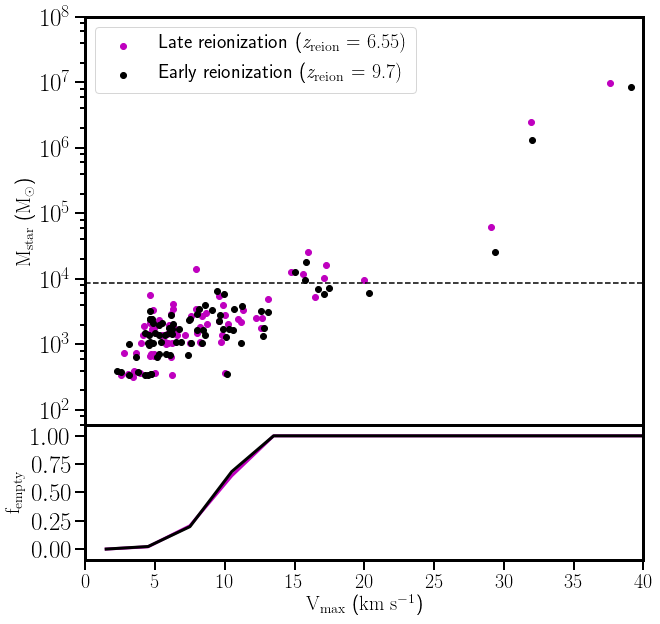

In [20]:
from matplotlib import gridspec
#Okay I'm now going to do this in the style of how I did it for my
#sims

halo_list = ['m10e', 'm10h','m10a']

#initiate plot
plt.figure(1,(10,10))
gs = gridspec.GridSpec(2,1,height_ratios=[3,1],hspace=0.0)
ax0 = plt.subplot(gs[0])
ax0.get_xaxis().set_visible(False)
#plt.xscale('log')
plt.yscale('log')
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.plot([0.0,45.0],[345.0*25.0,345.0*25.0],color='k',linestyle='--')
plt.xlabel(r'$\rm V_{max}$ ($km s^{-1}$)',fontsize=20)
plt.ylabel(r'$\rm M_{star}$ ($\rm M_{\odot}$)',fontsize=20)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.xlim([0.0,40.0])
plt.ylim([6.0e1,1.0e8])

#initiate arrays
empty_halos_reion = np.array([])
empty_halos_fid = np.array([])
Vmax_empty_halos_reion = np.array([])
Vmax_empty_halos_fid = np.array([])
M_star_fid = np.array([])
M_star_reion = np.array([])

all_halos_reion = np.array([])
all_halos_fid = np.array([])
Vmax_all_halos_reion = np.array([])
Vmax_all_halos_fid = np.array([])

#loop over reion files

for ii in range(len(halo_list)):
    f_reion = np.loadtxt('../reruns/late_fg_6/'+halo_list[ii]+'/ahf_'+halo_list[ii]+'_late.z0.000.AHF_halos')
    
    h = 0.71

    mass_reion = f_reion[:,3]/h
    x_reion = f_reion[:,6]/h
    y_reion = f_reion[:,7]/h
    z_reion = f_reion[:,8]/h
    mass_star_reion = f_reion[:,64]/h
    vmax_reion = f_reion[:,16]
    r_vir_reion = f_reion[:,11]/h
    f_hires_reion = f_reion[:,37]
    
    non_zero_star = (mass_star_reion!=0.0)
    hi_res_halos = (f_hires_reion>=1.0)
    
    #now append the array with the halos
    empty_halos_reion = np.concatenate([empty_halos_reion,mass_reion[hi_res_halos&~non_zero_star]])
    Vmax_empty_halos_reion = np.concatenate([Vmax_empty_halos_reion,vmax_reion[hi_res_halos&~non_zero_star]])
    
    all_halos_reion = np.concatenate([all_halos_reion,mass_reion[hi_res_halos]])
    Vmax_all_halos_reion = np.concatenate([Vmax_all_halos_reion,vmax_reion[hi_res_halos]])
    M_star_reion = np.concatenate([M_star_reion,mass_star_reion[hi_res_halos]])
    
    plt.scatter(vmax_reion[hi_res_halos&non_zero_star],mass_star_reion[hi_res_halos&non_zero_star],color='m')
    #plt.scatter(vmax_reion[hi_res_halos&~non_zero_star],np.ones_like(vmax_reion[hi_res_halos&~non_zero_star])*2.0e2,color='m',marker='v')

for ii in range(len(halo_list)):
    f_fid = np.loadtxt('../reruns/fg_reion/'+halo_list[ii]+'/ahf_'+halo_list[ii]+'_fg.z0.000.AHF_halos')

    mass_fid = f_fid[:,3]/h
    x_fid = f_fid[:,6]/h
    y_fid = f_fid[:,7]/h
    z_fid = f_fid[:,8]/h
    mass_star_fid = f_fid[:,64]/h
    vmax_fid = f_fid[:,16]
    r_vir_fid = f_fid[:,11]/h
    f_hires_fid = f_fid[:,37]

    non_zero_star = (mass_star_fid!=0.0)
    hi_res_halos = (f_hires_fid>=1.0)
    
    #now append the array with the halos
    empty_halos_fid = np.concatenate([empty_halos_fid,mass_fid[hi_res_halos&~non_zero_star]])
    Vmax_empty_halos_fid = np.concatenate([Vmax_empty_halos_fid,vmax_fid[hi_res_halos&~non_zero_star]])
    
    all_halos_fid = np.concatenate([all_halos_fid,mass_fid[hi_res_halos]])
    Vmax_all_halos_fid = np.concatenate([Vmax_all_halos_fid,vmax_fid[hi_res_halos]])
    M_star_fid = np.concatenate([M_star_fid,mass_star_fid[hi_res_halos]])
    
    plt.scatter(vmax_fid[hi_res_halos&non_zero_star],mass_star_fid[hi_res_halos&non_zero_star],color='k')
    #plt.scatter(vmax_fid[hi_res_halos&~non_zero_star],np.ones_like(vmax_fid[hi_res_halos&~non_zero_star])*2.0e2,color='k',marker='v')

plt.scatter([],[],color='m',label=r'Late reionization ($\it{z}_{\rm reion}$ = \rm 6.9)')
plt.scatter([],[],color='k',label=r'Early reionization ($\it{z}_{\rm reion}$ = \rm 10.4)')
plt.legend(loc=2,fontsize=20)
v_max_bins = np.linspace(0.0,45.0,16)

v_max_bins_plot = [(v_max_bins[ii]+v_max_bins[ii+1])/2.0 for ii in range(len(v_max_bins)-1)]
n_all_reion, bins_all_reion = np.histogram(Vmax_all_halos_reion,bins=v_max_bins)
n_empty_reion, bins_empty_reion = np.histogram(Vmax_empty_halos_reion,bins=v_max_bins)

frac_empty_reion = 1.0-np.nan_to_num(n_empty_reion.astype(float)/n_all_reion.astype(float))

n_all_fid, bins_all_fid = np.histogram(Vmax_all_halos_fid,bins=v_max_bins)
n_empty_fid, bins_empty_fid = np.histogram(Vmax_empty_halos_fid,bins=v_max_bins)

frac_empty_fid = 1.0-np.nan_to_num(n_empty_fid.astype(float)/n_all_fid.astype(float))

ax1 = plt.subplot(gs[1])
plt.xlabel(r'$\rm V_{max}$ ($\rm km$ $\rm s^{-1}$)',fontsize=20)
plt.ylabel(r'$\rm f_{empty}$',fontsize=20)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.plot(v_max_bins_plot,frac_empty_reion,color='m',linewidth=3)
plt.plot(v_max_bins_plot,frac_empty_fid,color='k',linewidth=3)
#plt.plot(V_fit,fit_field,color='C1',linestyle='--',linewidth=3)
plt.xlim([0.0,40.0])
#plt.xlim([1.0e7,1.0e11])
plt.ylim([-0.1,1.1])
#plt.savefig('./paper_figures/Vmax_fraction.png',bbox_inches='tight')
plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:106: RuntimeWarning: invalid value encountered in divide


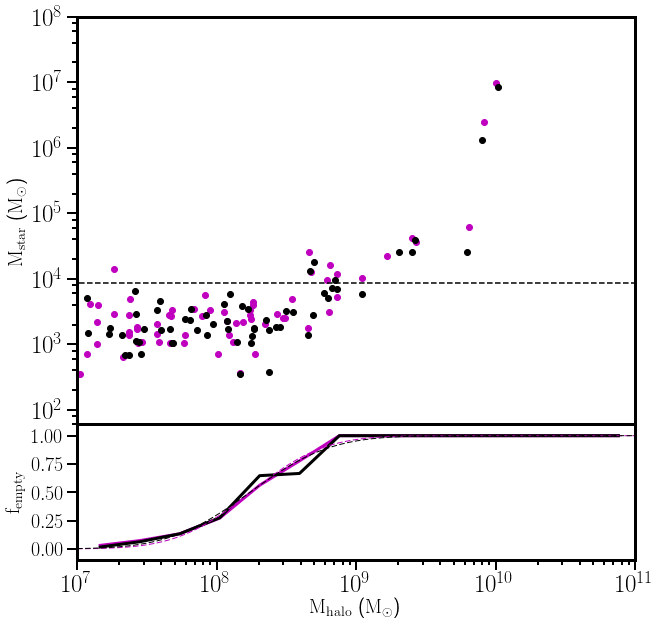

In [24]:
from matplotlib import gridspec
from scipy.special import erf
from scipy.optimize import curve_fit


def normal_cdf(x,sigma,mu):
    return 0.5*(1.0+erf((x-mu)/(sigma*np.sqrt(2.0))))

halo_list = ['m10e','m10h','m10a']

#initiate plot
plt.figure(1,(10,10))
gs = gridspec.GridSpec(2,1,height_ratios=[3,1],hspace=0.0)
ax0 = plt.subplot(gs[0])
ax0.get_xaxis().set_visible(False)
plt.xscale('log')
plt.yscale('log')
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.plot([1.0,1.0e11],[345.0*25.0,345.0*25.0],color='k',linestyle='--')
plt.ylabel(r'$\rm M_{star}$ ($\rm M_{\odot}$)',fontsize=20)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.xlim([1.0e7,1.0e11])
plt.ylim([6.0e1,1.0e8])

#initiate arrays
empty_halos_reion = np.array([])
empty_halos_fid = np.array([])
Vmax_empty_halos_reion = np.array([])
Vmax_empty_halos_fid = np.array([])

all_halos_reion = np.array([])
all_halos_fid = np.array([])
Vmax_all_halos_reion = np.array([])
Vmax_all_halos_fid = np.array([])

#loop over reion files

for ii in range(len(halo_list)):
    f_reion = np.loadtxt('../reruns/late_fg_6/'+halo_list[ii]+'/ahf_'+halo_list[ii]+'_late.z0.000.AHF_halos')
    
    h = 0.71

    mass_reion = f_reion[:,3]/h
    x_reion = f_reion[:,6]/h
    y_reion = f_reion[:,7]/h
    z_reion = f_reion[:,8]/h
    mass_star_reion = f_reion[:,64]/h
    vmax_reion = f_reion[:,16]
    r_vir_reion = f_reion[:,11]/h
    f_hires_reion = f_reion[:,37]
    
    non_zero_star = (mass_star_reion!=0.0)
    hi_res_halos = (f_hires_reion>0.95)
    
    #now append the array with the halos
    empty_halos_reion = np.concatenate([empty_halos_reion,mass_reion[hi_res_halos&~non_zero_star]])
    Vmax_empty_halos_reion = np.concatenate([Vmax_empty_halos_reion,vmax_reion[hi_res_halos&~non_zero_star]])
    
    all_halos_reion = np.concatenate([all_halos_reion,mass_reion[hi_res_halos]])
    Vmax_all_halos_reion = np.concatenate([Vmax_all_halos_reion,vmax_reion[hi_res_halos]])
    
    plt.scatter(mass_reion[hi_res_halos&non_zero_star],mass_star_reion[hi_res_halos&non_zero_star],color='m')
    #plt.scatter(mass_reion[hi_res_halos&~non_zero_star],np.ones_like(mass_reion[hi_res_halos&~non_zero_star])*2.0e2,color='m',marker='v')

for ii in range(len(halo_list)):
    f_fid = np.loadtxt('../reruns/fg_reion/'+halo_list[ii]+'/ahf_'+halo_list[ii]+'_fg.z0.000.AHF_halos')

    mass_fid = f_fid[:,3]/h
    x_fid = f_fid[:,6]/h
    y_fid = f_fid[:,7]/h
    z_fid = f_fid[:,8]/h
    mass_star_fid = f_fid[:,64]/h
    vmax_fid = f_fid[:,16]
    r_vir_fid = f_fid[:,11]/h
    f_hires_fid = f_fid[:,37]

    non_zero_star = (mass_star_fid!=0.0)
    hi_res_halos = (f_hires_fid>0.95)
    
    #now append the array with the halos
    empty_halos_fid = np.concatenate([empty_halos_fid,mass_fid[hi_res_halos&~non_zero_star]])
    Vmax_empty_halos_fid = np.concatenate([Vmax_empty_halos_fid,vmax_fid[hi_res_halos&~non_zero_star]])
    
    all_halos_fid = np.concatenate([all_halos_fid,mass_fid[hi_res_halos]])
    Vmax_all_halos_fid = np.concatenate([Vmax_all_halos_fid,vmax_fid[hi_res_halos]])
    
    plt.scatter(mass_fid[hi_res_halos&non_zero_star],mass_star_fid[hi_res_halos&non_zero_star],color='k')
    #plt.scatter(mass_fid[hi_res_halos&~non_zero_star],np.ones_like(mass_fid[hi_res_halos&~non_zero_star])*2.0e2,color='k',marker='v')

m_halo_bins = np.logspace(7.0,11.0,15)

m_halo_bins_plot = [(m_halo_bins[ii]+m_halo_bins[ii+1])/2.0 for ii in range(len(m_halo_bins)-1)]

m_bins_mean_log = [np.log10(xx) for xx in m_halo_bins_plot]
n_all_reion, bins_all_reion = np.histogram(all_halos_reion,bins=m_halo_bins)
n_empty_reion, bins_empty_reion = np.histogram(empty_halos_reion,bins=m_halo_bins)

frac_empty_reion = 1.0-np.nan_to_num(n_empty_reion.astype(float)/n_all_reion.astype(float))

n_all_fid, bins_all_fid = np.histogram(all_halos_fid,bins=m_halo_bins)
n_empty_fid, bins_empty_fid = np.histogram(empty_halos_fid,bins=m_halo_bins)

frac_empty_fid = 1.0-np.nan_to_num(n_empty_fid.astype(float)/n_all_fid.astype(float))

x_fit = np.linspace(7.0,11.0,100)

popt_reion, pcov_reion = curve_fit(normal_cdf, m_bins_mean_log, frac_empty_reion,p0=[8.4,1.0])
popt_fid, pcov_fid = curve_fit(normal_cdf, m_bins_mean_log, frac_empty_fid,p0=[8.4,1.0])

fit_reion = normal_cdf(x_fit,*popt_reion)
fit_fid = normal_cdf(x_fit,*popt_fid)

x_fit_plot = np.power(10.0,x_fit)

ax1 = plt.subplot(gs[1])
plt.xlabel(r'$\rm M_{halo}$ ($\rm M_{\odot}$)',fontsize=20)
plt.ylabel(r'$\rm f_{empty}$',fontsize=20)
rc('axes',linewidth=3)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.plot(m_halo_bins_plot,frac_empty_reion,color='m',linewidth=3)
plt.plot(m_halo_bins_plot,frac_empty_fid,color='k',linewidth=3)

plt.plot(x_fit_plot,fit_reion,color='m',linewidth=1,linestyle='--')
plt.plot(x_fit_plot,fit_fid,color='k',linewidth=1,linestyle='--')

plt.xlim([1.0e7,1.0e11])
plt.xscale('log')
plt.ylim([-0.1,1.1])
#plt.savefig('./paper_figures/M_halo_fraction.png',bbox_inches='tight')
plt.show()

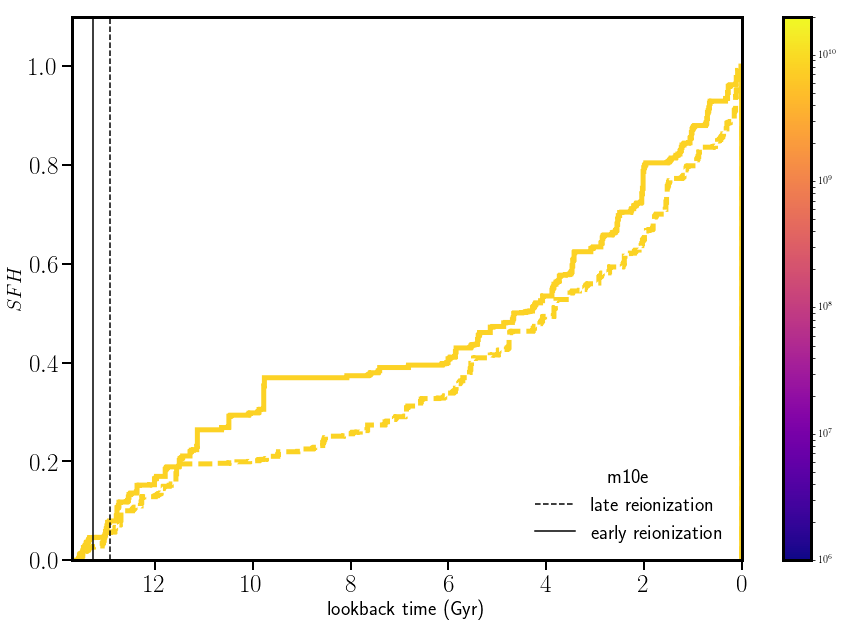

In [82]:
import pandas as pd

A_cosmo = FlatLambdaCDM(H0=71.0,Om0=0.266,Ob0=0.0449,Neff=0.963)

sfh_list = np.linspace(0.0,1.1,100)

t_early = np.ones_like(sfh_list)*A_cosmo.age(0.0).value-np.ones_like(sfh_list)*A_cosmo.age(10.4).value
t_late = np.ones_like(sfh_list)*A_cosmo.age(0.0).value-np.ones_like(sfh_list)*A_cosmo.age(6.9).value

fid_part = pd.read_pickle('../reruns/fg_reion/m10e/ahf_part_file_m10e_fg_100.pkl')
reion_part = pd.read_pickle('../reruns/late_fg_6/m10e/ahf_part_file_m10e_late_100.pkl')

fid_halo = pd.read_pickle('../reruns/fg_reion/m10e/ahf_halo_file_m10e_fg_100.pkl')
reion_halo = pd.read_pickle('../reruns/late_fg_6/m10e/ahf_halo_file_m10e_late_100.pkl')

#print fid_halo['halo_ids']
#print fid_halo['M_vir']

h_id_fg = str(fid_halo['halo_ids'][0])
h_id_late = str(reion_halo['halo_ids'][0])

#print fid_halo['M_vir'][0]

#print fid_part.keys()

#print np.mean(fid_part[h_id_fg]['masses'])
#print np.mean(reion_part[h_id_late]['masses'])

host_ages_fid = fid_part[h_id_fg]['ages']
host_z_fid = 1.0/host_ages_fid - 1.0
host_t_fid = A_cosmo.age(host_z_fid).value #age (of the univers) when the star particle formed
host_lbt_fid = np.ones_like(host_t_fid)*A_cosmo.age(0).value - host_t_fid

host_ages_reion = reion_part[h_id_late]['ages']
host_z_reion = 1.0/host_ages_reion - 1.0
host_t_reion = A_cosmo.age(host_z_reion).value #age (of the univers) when the star particle formed
host_lbt_reion = np.ones_like(host_t_reion)*A_cosmo.age(0).value - host_t_reion

lbt_bins = np.linspace(0.0,13.7,1000)

#plt.figure(1,(10,10))
#gs = gridspec.GridSpec(2,1,height_ratios=[3,1],hspace=0.0)
#ax0 = plt.subplot(gs[0])
fig1 = plt.figure(1,(15,10))

#lets set up a dummy colorbar?
cmap = matplotlib.cm.plasma
#norm = matplotlib.colors.Normalize(vmin=1.0e6,vmax=2.0e10)
norm = matplotlib.colors.LogNorm(vmin=1.0e6,vmax=2.0e10)
s_m = matplotlib.cm.ScalarMappable(cmap=cmap,norm=norm)
s_m.set_array([])

#ax1 = plt.subplot(gs[1])
plt.xlabel('lookback time (Gyr)',fontsize=20)
plt.ylabel('$SFH$',fontsize=20)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.hist(host_lbt_fid,bins=lbt_bins,color=s_m.to_rgba(fid_halo['M_vir'][0]),cumulative=-1,normed=True,histtype='step',linewidth=5)
plt.hist(host_lbt_reion,bins=lbt_bins,color=s_m.to_rgba(reion_halo['M_vir'][0]),linestyle='--',cumulative=-1,normed=True,histtype='step',linewidth=5)
#plt.plot(V_fit,fit_field,color='C1',linestyle='--',linewidth=3)
plt.ylim([0.0,1.1])
plt.xlim([13.7,0.0])
plt.plot(t_late,sfh_list,color='k',linestyle='--')
plt.plot(t_early,sfh_list,color='k')
plt.plot([],[],color='k',linestyle='--',label='late reionization')
plt.plot([],[],color='k',label='early reionization')
#plt.ylim([0.0,1.0])
#plt.savefig('./figs/Vmax_fraction.png')
#plt.legend(loc=2,prop={'size': 20})
legend = plt.legend(loc=4,frameon=False,title='m10e',fontsize=20)
plt.setp(legend.get_title(),fontsize=20)
plt.colorbar(s_m)
plt.show()

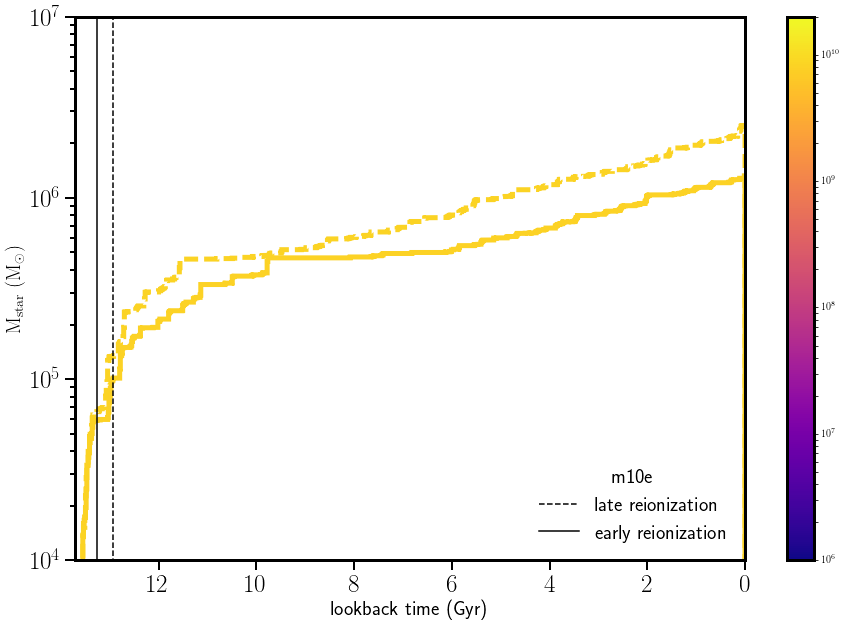

In [84]:
import pandas as pd

A_cosmo = FlatLambdaCDM(H0=71.0,Om0=0.266,Ob0=0.0449,Neff=0.963)

fid_part = pd.read_pickle('../reruns/fg_reion/m10e/ahf_part_file_m10e_fg_100.pkl')
reion_part = pd.read_pickle('../reruns/late_fg_6/m10e/ahf_part_file_m10e_late_100.pkl')

fid_halo = pd.read_pickle('../reruns/fg_reion/m10e/ahf_halo_file_m10e_fg_100.pkl')
reion_halo = pd.read_pickle('../reruns/late_fg_6/m10e/ahf_halo_file_m10e_late_100.pkl')

#print fid_halo['halo_ids']
#print fid_halo['M_vir']

h_id_fg = str(fid_halo['halo_ids'][0])
h_id_late = str(reion_halo['halo_ids'][0])

#print fid_halo['M_vir'][0]

#print fid_part.keys()

#print np.mean(fid_part[h_id_fg]['masses'])
#print np.mean(reion_part[h_id_late]['masses'])

host_ages_fid = fid_part[h_id_fg]['ages']
host_masses_fid = fid_part[h_id_fg]['masses']
host_z_fid = 1.0/host_ages_fid - 1.0
host_t_fid = A_cosmo.age(host_z_fid).value #age (of the univers) when the star particle formed
host_lbt_fid = np.ones_like(host_t_fid)*A_cosmo.age(0).value - host_t_fid

host_ages_reion = reion_part[h_id_late]['ages']
host_masses_reion = reion_part[h_id_late]['masses']
host_z_reion = 1.0/host_ages_reion - 1.0
host_t_reion = A_cosmo.age(host_z_reion).value #age (of the univers) when the star particle formed
host_lbt_reion = np.ones_like(host_t_reion)*A_cosmo.age(0).value - host_t_reion

lbt_bins = np.linspace(0.0,13.7,1000)

fig1 = plt.figure(1,(15,10))

#lets set up a dummy colorbar?
cmap = matplotlib.cm.plasma
#norm = matplotlib.colors.Normalize(vmin=1.0e6,vmax=2.0e10)
norm = matplotlib.colors.LogNorm(vmin=1.0e6,vmax=2.0e10)
s_m = matplotlib.cm.ScalarMappable(cmap=cmap,norm=norm)
s_m.set_array([])

#ax1 = plt.subplot(gs[1])
plt.xlabel('lookback time (Gyr)',fontsize=20)
plt.ylabel(r'$\rm M_{star}$ $\rm (M_{\odot})$',fontsize=20)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.hist(host_lbt_fid,bins=lbt_bins,weights=host_masses_fid,color=s_m.to_rgba(fid_halo['M_vir'][0]),cumulative=-1,normed=False,histtype='step',linewidth=5)
plt.hist(host_lbt_reion,bins=lbt_bins,weights=host_masses_reion,color=s_m.to_rgba(reion_halo['M_vir'][0]),linestyle='--',cumulative=-1,normed=False,histtype='step',linewidth=5)
#plt.plot(V_fit,fit_field,color='C1',linestyle='--',linewidth=3)
#plt.xlim([5.0,40.0])
plt.yscale('log')
plt.xlim([13.7,0.0])
plt.ylim([1.0e4,1.0e7])
plt.plot(t_late,sfh_list*1.0e10,color='k',linestyle='--')
plt.plot(t_early,sfh_list*1.0e10,color='k')
plt.plot([],[],color='k',linestyle='--',label='late reionization')
plt.plot([],[],color='k',label='early reionization')
legend = plt.legend(loc=4,frameon=False,title='m10e',fontsize=20)
plt.setp(legend.get_title(),fontsize=20)
plt.colorbar(s_m)
plt.show()

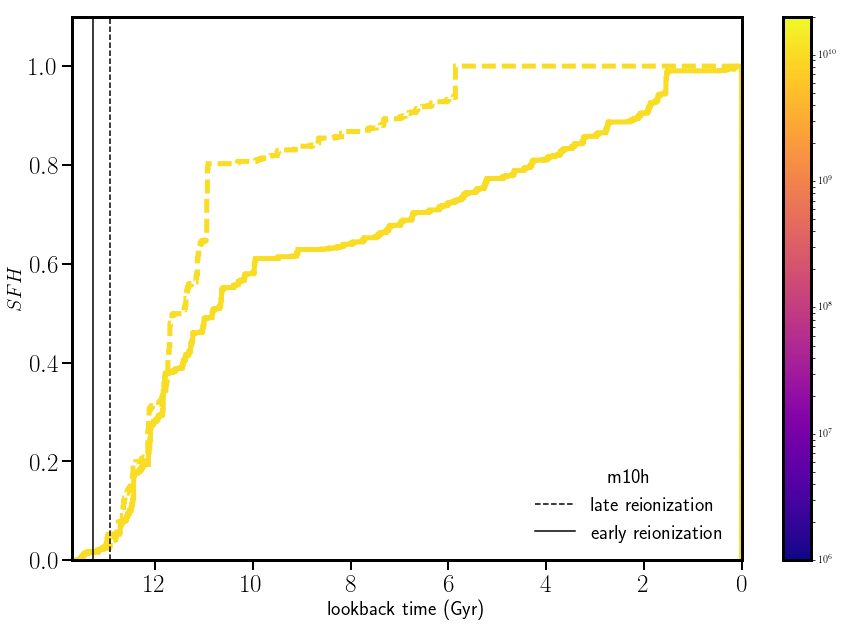

In [85]:
import pandas as pd

t_early = np.ones_like(sfh_list)*A_cosmo.age(0.0).value-np.ones_like(sfh_list)*A_cosmo.age(10.4).value
t_late = np.ones_like(sfh_list)*A_cosmo.age(0.0).value-np.ones_like(sfh_list)*A_cosmo.age(6.9).value

A_cosmo = FlatLambdaCDM(H0=71.0,Om0=0.266,Ob0=0.0449,Neff=0.963)

fid_part = pd.read_pickle('../reruns/fg_reion/m10h/ahf_part_file_m10h_fg_100.pkl')
reion_part = pd.read_pickle('../reruns/late_fg_6/m10h/ahf_part_file_m10h_late_100.pkl')

fid_halo = pd.read_pickle('../reruns/fg_reion/m10h/ahf_halo_file_m10h_fg_100.pkl')
reion_halo = pd.read_pickle('../reruns/late_fg_6/m10h/ahf_halo_file_m10h_late_100.pkl')

h_id_fg = str(fid_halo['halo_ids'][0])
h_id_late = str(reion_halo['halo_ids'][0])

host_ages_fid = fid_part[h_id_fg]['ages']
host_z_fid = 1.0/host_ages_fid - 1.0
host_t_fid = A_cosmo.age(host_z_fid).value #age (of the univers) when the star particle formed
host_lbt_fid = np.ones_like(host_t_fid)*A_cosmo.age(0).value - host_t_fid

host_ages_reion = reion_part[h_id_late]['ages']
host_z_reion = 1.0/host_ages_reion - 1.0
host_t_reion = A_cosmo.age(host_z_reion).value #age (of the univers) when the star particle formed
host_lbt_reion = np.ones_like(host_t_reion)*A_cosmo.age(0).value - host_t_reion

lbt_bins = np.linspace(0.0,13.7,1000)

#plt.figure(1,(10,10))
#gs = gridspec.GridSpec(2,1,height_ratios=[3,1],hspace=0.0)
#ax0 = plt.subplot(gs[0])
fig1 = plt.figure(1,(15,10))

#lets set up a dummy colorbar?
cmap = matplotlib.cm.plasma
#norm = matplotlib.colors.Normalize(vmin=1.0e6,vmax=2.0e10)
norm = matplotlib.colors.LogNorm(vmin=1.0e6,vmax=2.0e10)
s_m = matplotlib.cm.ScalarMappable(cmap=cmap,norm=norm)
s_m.set_array([])

#ax1 = plt.subplot(gs[1])
plt.xlabel('lookback time (Gyr)',fontsize=20)
plt.ylabel('$SFH$',fontsize=20)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.hist(host_lbt_fid,bins=lbt_bins,color=s_m.to_rgba(fid_halo['M_vir'][0]),cumulative=-1,normed=True,histtype='step',linewidth=5)
plt.hist(host_lbt_reion,bins=lbt_bins,color=s_m.to_rgba(reion_halo['M_vir'][0]),linestyle='--',cumulative=-1,normed=True,histtype='step',linewidth=5)
#plt.plot(V_fit,fit_field,color='C1',linestyle='--',linewidth=3)
plt.ylim([0.0,1.1])
plt.xlim([13.7,0.0])
plt.plot(t_late,sfh_list*1.0e10,color='k',linestyle='--')
plt.plot(t_early,sfh_list*1.0e10,color='k')
plt.plot([],[],color='k',linestyle='--',label='late reionization')
plt.plot([],[],color='k',label='early reionization')
legend = plt.legend(loc=4,frameon=False,title='m10h',fontsize=20)
plt.setp(legend.get_title(),fontsize=20)
plt.colorbar(s_m)
plt.show()

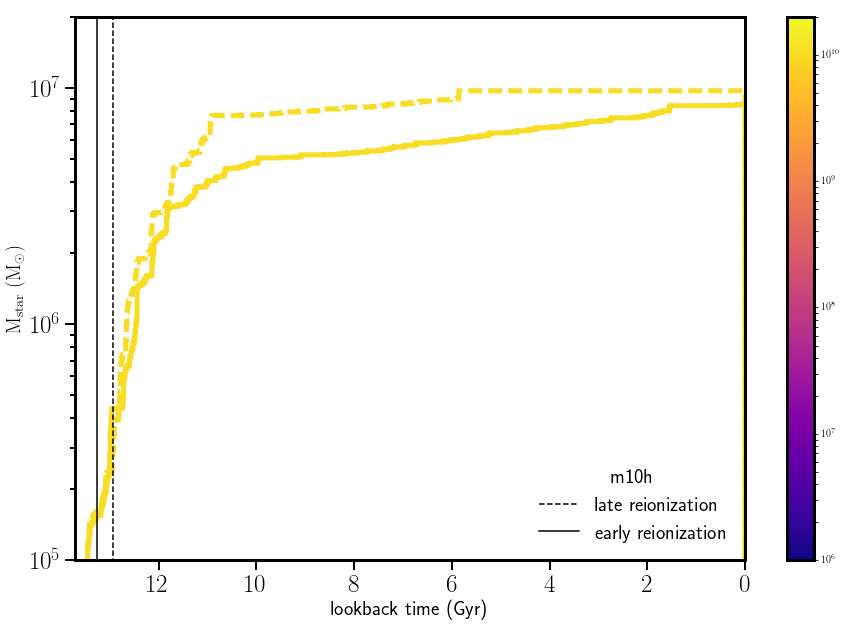

In [87]:
import pandas as pd

A_cosmo = FlatLambdaCDM(H0=71.0,Om0=0.266,Ob0=0.0449,Neff=0.963)

fid_part = pd.read_pickle('../reruns/fg_reion/m10h/ahf_part_file_m10h_fg_100.pkl')
reion_part = pd.read_pickle('../reruns/late_fg_6/m10h/ahf_part_file_m10h_late_100.pkl')

fid_halo = pd.read_pickle('../reruns/fg_reion/m10h/ahf_halo_file_m10h_fg_100.pkl')
reion_halo = pd.read_pickle('../reruns/late_fg_6/m10h/ahf_halo_file_m10h_late_100.pkl')

h_id_fg = str(fid_halo['halo_ids'][0])
h_id_late = str(reion_halo['halo_ids'][0])

host_ages_fid = fid_part[h_id_fg]['ages']
host_masses_fid = fid_part[h_id_fg]['masses']
host_z_fid = 1.0/host_ages_fid - 1.0
host_t_fid = A_cosmo.age(host_z_fid).value #age (of the univers) when the star particle formed
host_lbt_fid = np.ones_like(host_t_fid)*A_cosmo.age(0).value - host_t_fid

host_ages_reion = reion_part[h_id_late]['ages']
host_masses_reion = reion_part[h_id_late]['masses']
host_z_reion = 1.0/host_ages_reion - 1.0
host_t_reion = A_cosmo.age(host_z_reion).value #age (of the univers) when the star particle formed
host_lbt_reion = np.ones_like(host_t_reion)*A_cosmo.age(0).value - host_t_reion

lbt_bins = np.linspace(0.0,13.7,1000)

fig1 = plt.figure(1,(15,10))

#lets set up a dummy colorbar?
cmap = matplotlib.cm.plasma
#norm = matplotlib.colors.Normalize(vmin=1.0e6,vmax=2.0e10)
norm = matplotlib.colors.LogNorm(vmin=1.0e6,vmax=2.0e10)
s_m = matplotlib.cm.ScalarMappable(cmap=cmap,norm=norm)
s_m.set_array([])

#ax1 = plt.subplot(gs[1])
plt.xlabel('lookback time (Gyr)',fontsize=20)
plt.ylabel(r'$\rm M_{star}$ $\rm (M_{\odot})$',fontsize=20)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.hist(host_lbt_fid,bins=lbt_bins,weights=host_masses_fid,color=s_m.to_rgba(fid_halo['M_vir'][0]),cumulative=-1,normed=False,histtype='step',linewidth=5)
plt.hist(host_lbt_reion,bins=lbt_bins,weights=host_masses_reion,color=s_m.to_rgba(reion_halo['M_vir'][0]),linestyle='--',cumulative=-1,normed=False,histtype='step',linewidth=5)
#plt.plot(V_fit,fit_field,color='C1',linestyle='--',linewidth=3)
#plt.xlim([5.0,40.0])
plt.yscale('log')
plt.xlim([13.7,0.0])
plt.ylim([1.0e5,2.0e7])
plt.plot(t_late,sfh_list*1.0e10,color='k',linestyle='--')
plt.plot(t_early,sfh_list*1.0e10,color='k')
plt.plot([],[],color='k',linestyle='--',label='late reionization')
plt.plot([],[],color='k',label='early reionization')
legend = plt.legend(loc=4,frameon=False,title='m10h',fontsize=20)
plt.setp(legend.get_title(),fontsize=20)
plt.colorbar(s_m)
plt.show()

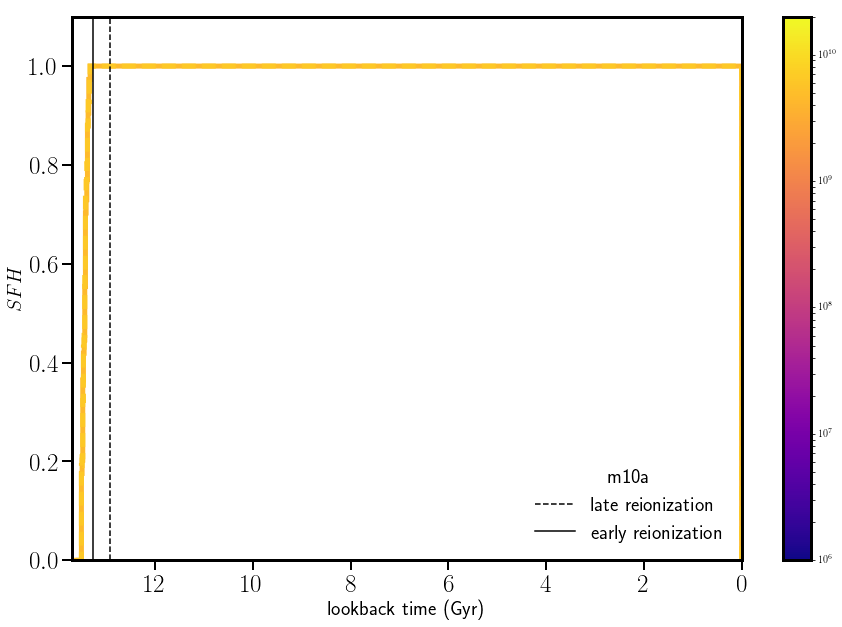

In [91]:
import pandas as pd

sfh_list = np.linspace(0.0,1.1,100)

A_cosmo = FlatLambdaCDM(H0=71.0,Om0=0.266,Ob0=0.0449,Neff=0.963)

fid_part = pd.read_pickle('../reruns/fg_reion/m10a/ahf_part_file_m10a_fg_100.pkl')
reion_part = pd.read_pickle('../reruns/late_fg_6/m10a/ahf_part_file_m10a_late_100.pkl')

fid_halo = pd.read_pickle('../reruns/fg_reion/m10a/ahf_halo_file_m10a_fg_100.pkl')
reion_halo = pd.read_pickle('../reruns/late_fg_6/m10a/ahf_halo_file_m10a_late_100.pkl')

h_id_fg = str(fid_halo['halo_ids'][0])
h_id_late = str(reion_halo['halo_ids'][0])

host_ages_fid = fid_part[h_id_fg]['ages']
host_z_fid = 1.0/host_ages_fid - 1.0
host_t_fid = A_cosmo.age(host_z_fid).value #age (of the univers) when the star particle formed
host_lbt_fid = np.ones_like(host_t_fid)*A_cosmo.age(0).value - host_t_fid

host_ages_reion = reion_part[h_id_late]['ages']
host_z_reion = 1.0/host_ages_reion - 1.0
host_t_reion = A_cosmo.age(host_z_reion).value #age (of the univers) when the star particle formed
host_lbt_reion = np.ones_like(host_t_reion)*A_cosmo.age(0).value - host_t_reion

lbt_bins = np.linspace(0.0,13.7,1000)

#plt.figure(1,(10,10))
#gs = gridspec.GridSpec(2,1,height_ratios=[3,1],hspace=0.0)
#ax0 = plt.subplot(gs[0])
fig1 = plt.figure(1,(15,10))

#lets set up a dummy colorbar?
cmap = matplotlib.cm.plasma
#norm = matplotlib.colors.Normalize(vmin=1.0e6,vmax=2.0e10)
norm = matplotlib.colors.LogNorm(vmin=1.0e6,vmax=2.0e10)
s_m = matplotlib.cm.ScalarMappable(cmap=cmap,norm=norm)
s_m.set_array([])

#ax1 = plt.subplot(gs[1])
plt.xlabel('lookback time (Gyr)',fontsize=20)
plt.ylabel('$SFH$',fontsize=20)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.hist(host_lbt_fid,bins=lbt_bins,color=s_m.to_rgba(fid_halo['M_vir'][0]),cumulative=-1,normed=True,histtype='step',linewidth=5)
plt.hist(host_lbt_reion,bins=lbt_bins,color=s_m.to_rgba(reion_halo['M_vir'][0]),linestyle='--',cumulative=-1,normed=True,histtype='step',linewidth=5)
#plt.plot(V_fit,fit_field,color='C1',linestyle='--',linewidth=3)
plt.ylim([0.0,1.1])
plt.xlim([13.7,0.0])
plt.plot(t_late,sfh_list,color='k',linestyle='--')
plt.plot(t_early,sfh_list,color='k')
plt.plot([],[],color='k',linestyle='--',label='late reionization')
plt.plot([],[],color='k',label='early reionization')
legend = plt.legend(loc=4,frameon=False,title='m10a',fontsize=20)
plt.setp(legend.get_title(),fontsize=20)
plt.colorbar(s_m)
plt.show()

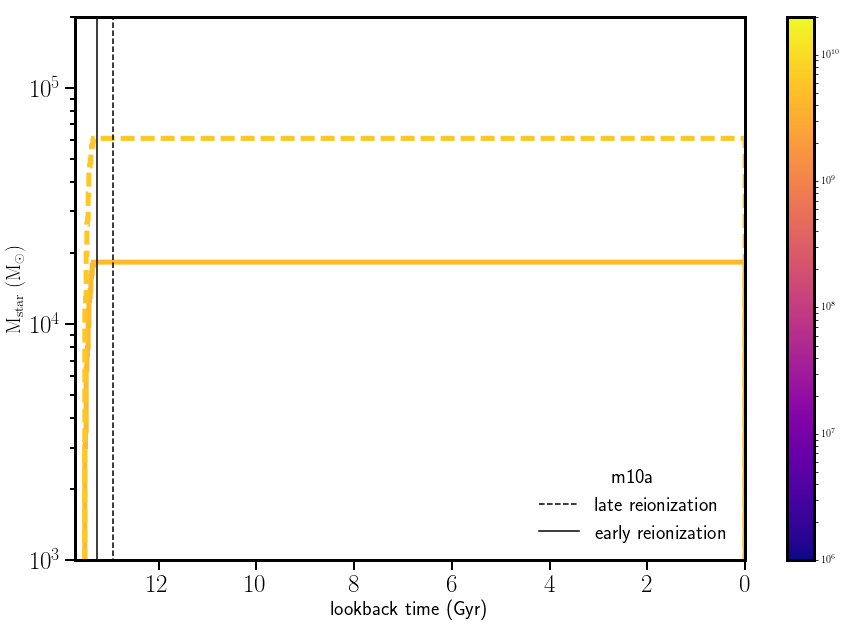

In [92]:
import pandas as pd

A_cosmo = FlatLambdaCDM(H0=71.0,Om0=0.266,Ob0=0.0449,Neff=0.963)

fid_part = pd.read_pickle('../reruns/fg_reion/m10a/ahf_part_file_m10a_fg_100.pkl')
reion_part = pd.read_pickle('../reruns/late_fg_6/m10a/ahf_part_file_m10a_late_100.pkl')

fid_halo = pd.read_pickle('../reruns/fg_reion/m10a/ahf_halo_file_m10a_fg_100.pkl')
reion_halo = pd.read_pickle('../reruns/late_fg_6/m10a/ahf_halo_file_m10a_late_100.pkl')

h_id_fg = str(fid_halo['halo_ids'][0])
h_id_late = str(reion_halo['halo_ids'][0])

host_ages_fid = fid_part[h_id_fg]['ages']
host_masses_fid = fid_part[h_id_fg]['masses']
host_z_fid = 1.0/host_ages_fid - 1.0
host_t_fid = A_cosmo.age(host_z_fid).value #age (of the univers) when the star particle formed
host_lbt_fid = np.ones_like(host_t_fid)*A_cosmo.age(0).value - host_t_fid

host_ages_reion = reion_part[h_id_late]['ages']
host_masses_reion = reion_part[h_id_late]['masses']
host_z_reion = 1.0/host_ages_reion - 1.0
host_t_reion = A_cosmo.age(host_z_reion).value #age (of the univers) when the star particle formed
host_lbt_reion = np.ones_like(host_t_reion)*A_cosmo.age(0).value - host_t_reion

lbt_bins = np.linspace(0.0,13.7,1000)

fig1 = plt.figure(1,(15,10))

#lets set up a dummy colorbar?
cmap = matplotlib.cm.plasma
#norm = matplotlib.colors.Normalize(vmin=1.0e6,vmax=2.0e10)
norm = matplotlib.colors.LogNorm(vmin=1.0e6,vmax=2.0e10)
s_m = matplotlib.cm.ScalarMappable(cmap=cmap,norm=norm)
s_m.set_array([])

#ax1 = plt.subplot(gs[1])
plt.xlabel('lookback time (Gyr)',fontsize=20)
plt.ylabel(r'$\rm M_{star}$ $\rm (M_{\odot})$',fontsize=20)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.hist(host_lbt_fid,bins=lbt_bins,weights=host_masses_fid,color=s_m.to_rgba(fid_halo['M_vir'][0]),cumulative=-1,normed=False,histtype='step',linewidth=5)
plt.hist(host_lbt_reion,bins=lbt_bins,weights=host_masses_reion,color=s_m.to_rgba(reion_halo['M_vir'][0]),linestyle='--',cumulative=-1,normed=False,histtype='step',linewidth=5)
#plt.plot(V_fit,fit_field,color='C1',linestyle='--',linewidth=3)
#plt.xlim([5.0,40.0])
plt.yscale('log')
plt.xlim([13.7,0.0])
plt.ylim([1.0e3,2.0e5])
plt.plot(t_late,sfh_list*1.0e10,color='k',linestyle='--')
plt.plot(t_early,sfh_list*1.0e10,color='k')
plt.plot([],[],color='k',linestyle='--',label='late reionization')
plt.plot([],[],color='k',label='early reionization')
legend = plt.legend(loc=4,frameon=False,title='m10a',fontsize=20)
plt.setp(legend.get_title(),fontsize=20)
plt.colorbar(s_m)
plt.show()

m10e
fid
m10h
fid
m10a
fid
m10e
reion
m10h
reion
m10a
reion


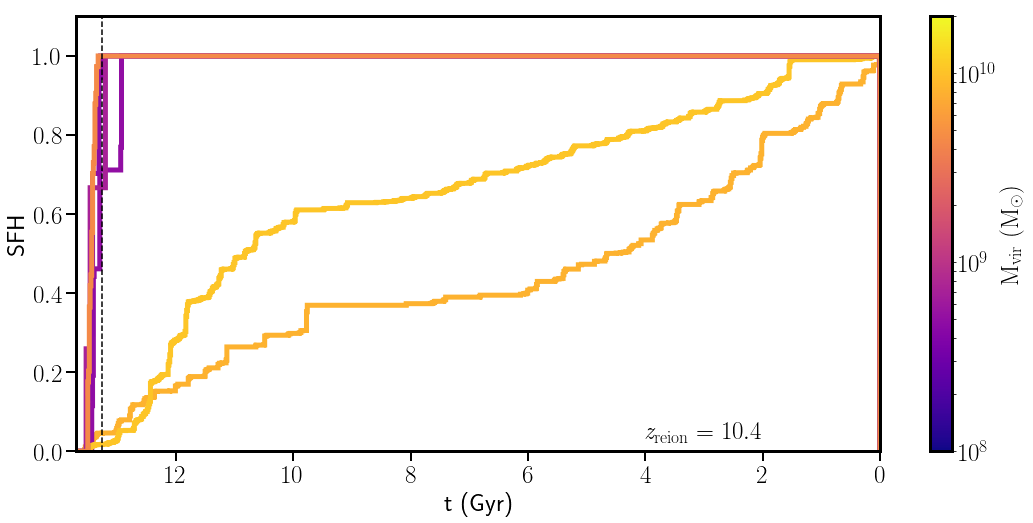

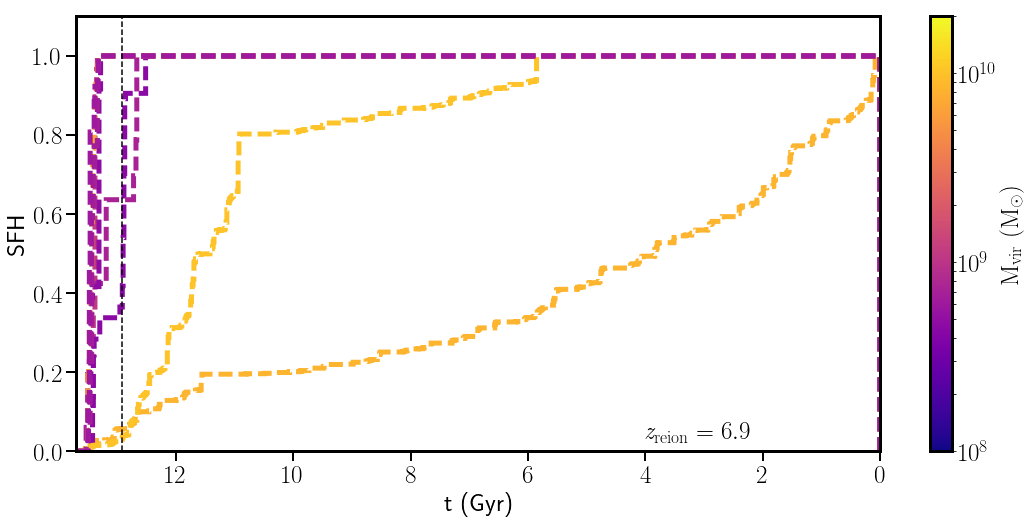

In [46]:
#halo_list = ['11707','20190','32503','796','848','897','948']
halo_list = ['m10e','m10h','m10a']

sfh_list = np.linspace(0.0,1.1,100)

t_early = np.ones_like(sfh_list)*A_cosmo.age(0.0).value-np.ones_like(sfh_list)*A_cosmo.age(10.4).value
t_late = np.ones_like(sfh_list)*A_cosmo.age(0.0).value-np.ones_like(sfh_list)*A_cosmo.age(6.9).value

fid_part = pd.read_pickle('../reruns/fg_reion/m10h/ahf_part_file_m10h_fg_100.pkl')
reion_part = pd.read_pickle('../reruns/late_fg_6/m10h/ahf_part_file_m10h_late_100.pkl')

fid_halo = pd.read_pickle('../reruns/fg_reion/m10h/ahf_halo_file_m10h_fg_100.pkl')
reion_halo = pd.read_pickle('../reruns/late_fg_6/m10h/ahf_halo_file_m10h_late_100.pkl')

fig1 = plt.figure(1,(18,8))
for halo_id in halo_list:
    print halo_id
    
    fid_part = pd.read_pickle('../reruns/fg_reion/'+halo_id+'/ahf_part_file_'+halo_id+'_fg_100.pkl')
    fid_halo = pd.read_pickle('../reruns/fg_reion/'+halo_id+'/ahf_halo_file_'+halo_id+'_fg_100.pkl')

    lbt_bins = np.linspace(0.0,13.7,1000)

    cmap = matplotlib.cm.plasma
    #norm = matplotlib.colors.Normalize(vmin=1.0e6,vmax=2.0e10)
    norm = matplotlib.colors.LogNorm(vmin=1.0e8,vmax=2.0e10)
    s_m = matplotlib.cm.ScalarMappable(cmap=cmap,norm=norm)
    s_m.set_array([])

    #plt.figure(1,(10,10))
    #gs = gridspec.GridSpec(2,1,height_ratios=[3,1],hspace=0.0)
    #ax0 = plt.subplot(gs[0])
    fig1 = plt.figure(1,(15,10))

    print 'fid'
    for ii in  range(len(fid_halo['M_vir'].values)):
        halo_mass = fid_halo['M_vir'].iloc[ii]
        key = fid_halo['halo_ids'].iloc[ii]    
        stars_in_halo = fid_part.loc['ages'][str(key)]
        if len(stars_in_halo)>25:
            #halo_mass = fid_halo['M_vir'][int(key)]
            host_z_fid = 1.0/stars_in_halo - 1.0
            host_t_fid = A_cosmo.age(host_z_fid).value #age (of the univers) when the star particle formed
            host_lbt_fid = np.ones_like(host_t_fid)*A_cosmo.age(0).value - host_t_fid

            plt.hist(host_lbt_fid,bins=lbt_bins,color=s_m.to_rgba(halo_mass),cumulative=-1,normed=True,histtype='step',linewidth=5)

plt.xlabel('t (Gyr)',fontsize=25)
plt.ylabel('SFH',fontsize=25)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.ylim([0.0,1.1])
plt.xlim([13.7,0.0])
plt.plot(t_early,sfh_list,color='k',linestyle='--')

plt.legend(loc=2,fontsize=25)
plt.text(4.0,0.02,r'$\it{z}_{\rm reion} = \rm 10.4$',fontsize=25)
cb = plt.colorbar(s_m)
cb.ax.tick_params(labelsize=25)
cb.set_label(label=r'$\rm M_{vir}$ $\rm (M_{\odot})$',fontsize=25)
#plt.savefig('./paper_figures/SFHs_fiducial.png',bbox_inches='tight')

fig2 = plt.figure(2,(18,8))
for halo_id in halo_list:
    print halo_id

    reion_part = pd.read_pickle('../reruns/late_fg_6/'+halo_id+'/ahf_part_file_'+halo_id+'_late_100.pkl')
    reion_halo = pd.read_pickle('../reruns/late_fg_6/'+halo_id+'/ahf_halo_file_'+halo_id+'_late_100.pkl')

    
    lbt_bins = np.linspace(0.0,13.7,1000)

    cmap = matplotlib.cm.plasma
    #norm = matplotlib.colors.Normalize(vmin=1.0e6,vmax=2.0e10)
    norm = matplotlib.colors.LogNorm(vmin=1.0e8,vmax=2.0e10)
    s_m = matplotlib.cm.ScalarMappable(cmap=cmap,norm=norm)
    s_m.set_array([])

    #plt.figure(1,(10,10))
    #gs = gridspec.GridSpec(2,1,height_ratios=[3,1],hspace=0.0)
    #ax0 = plt.subplot(gs[0])

    print 'reion'
    for ii in  range(len(reion_halo['M_vir'].values)):
        halo_mass = reion_halo['M_vir'].iloc[ii]
        key = reion_halo['halo_ids'].iloc[ii]    
        stars_in_halo = reion_part.loc['ages'][str(key)]
        #print key, len(stars_in_halo)
        if len(stars_in_halo)>25:
            #halo_mass = reion_halo['M_vir'][int(key)]
            host_z_reion = 1.0/stars_in_halo - 1.0
            host_t_reion = A_cosmo.age(host_z_reion).value #age (of the univers) when the star particle formed
            host_lbt_reion = np.ones_like(host_t_reion)*A_cosmo.age(0).value - host_t_reion

            plt.hist(host_lbt_reion,bins=lbt_bins,color=s_m.to_rgba(halo_mass),linestyle='--',cumulative=-1,normed=True,histtype='step',linewidth=5)

plt.xlabel('t (Gyr)',fontsize=25)
plt.ylabel('SFH',fontsize=25)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.ylim([0.0,1.1])
plt.xlim([13.7,0.0])
plt.plot(t_late,sfh_list,color='k',linestyle='--')
plt.legend(loc=2,fontsize=25)
cb = plt.colorbar(s_m)
cb.ax.tick_params(labelsize=25)
cb.set_label(label=r'$\rm M_{vir}$ $\rm (M_{\odot})$',fontsize=25)
plt.text(4.0,0.02,r'$\it{z}_{\rm reion}  = \rm 6.9$',fontsize=25)
#plt.savefig('./paper_figures/SFHs_reion.png',bbox_inches='tight')
plt.show()

m10e
fid
m10h
fid
m10a
fid
m10e
reion
m10h
reion
m10a
reion


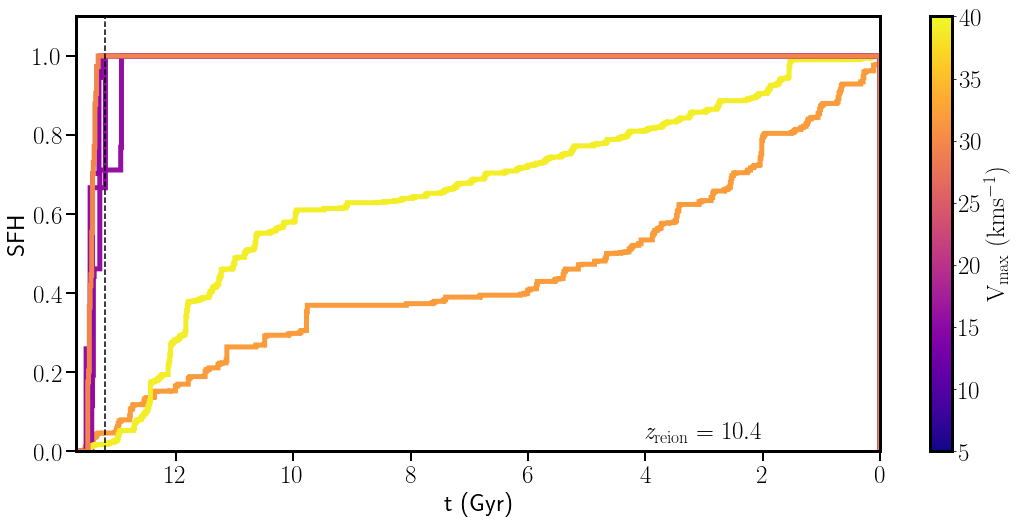

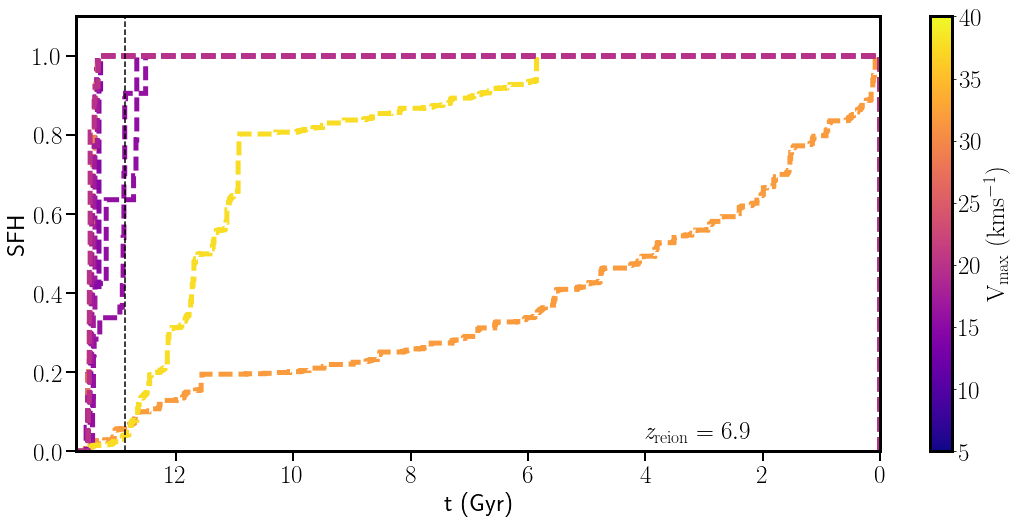

In [44]:
#halo_list = ['11707','20190','32503','796','848','897','948']
halo_list = ['m10e','m10h','m10a']

sfh_list = np.linspace(0.0,1.1,100)

t_early = np.ones_like(sfh_list)*A_cosmo.age(0.0).value-np.ones_like(sfh_list)*A_cosmo.age(10.4).value
t_late = np.ones_like(sfh_list)*A_cosmo.age(0.0).value-np.ones_like(sfh_list)*A_cosmo.age(6.9).value

fig1 = plt.figure(1,(18,8))
for halo_id in halo_list:
    print halo_id
    fid_part = pd.read_pickle('../reruns/fg_reion/'+halo_id+'/ahf_part_file_'+halo_id+'_fg_100.pkl')
    fid_halo = pd.read_pickle('../reruns/fg_reion/'+halo_id+'/ahf_halo_file_'+halo_id+'_fg_100.pkl')

    lbt_bins = np.linspace(0.0,13.7,1000)

    cmap = matplotlib.cm.plasma
    #norm = matplotlib.colors.Normalize(vmin=1.0e6,vmax=2.0e10)
    norm = matplotlib.colors.Normalize(vmin=5.0,vmax=40.0)
    s_m = matplotlib.cm.ScalarMappable(cmap=cmap,norm=norm)
    s_m.set_array([])

    #plt.figure(1,(10,10))
    #gs = gridspec.GridSpec(2,1,height_ratios=[3,1],hspace=0.0)
    #ax0 = plt.subplot(gs[0])
    fig1 = plt.figure(1,(15,10))

    print 'fid'
    for ii in  range(len(fid_halo['M_vir'].values)):
        halo_mass = fid_halo['M_vir'].iloc[ii]
        key = fid_halo['halo_ids'].iloc[ii]
        halo_vmax = fid_halo['V_max'].iloc[ii]
        stars_in_halo = fid_part.loc['ages'][str(key)]
        if len(stars_in_halo)>25:
            #halo_mass = fid_halo['M_vir'][int(key)]
            host_z_fid = 1.0/stars_in_halo - 1.0
            host_t_fid = A_cosmo.age(host_z_fid).value #age (of the univers) when the star particle formed
            host_lbt_fid = np.ones_like(host_t_fid)*A_cosmo.age(0).value - host_t_fid

            plt.hist(host_lbt_fid,bins=lbt_bins,color=s_m.to_rgba(halo_vmax),cumulative=-1,normed=True,histtype='step',linewidth=5)

plt.xlabel('t (Gyr)',fontsize=25)
plt.ylabel('SFH',fontsize=25)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.ylim([0.0,1.1])
plt.xlim([13.7,0.0])
plt.plot(t_early,sfh_list,color='k',linestyle='--')

plt.legend(loc=2,fontsize=25)
plt.text(4.0,0.02,r'$\it{z}_{\rm reion} = \rm 10.4$',fontsize=25)
cb = plt.colorbar(s_m)
cb.ax.tick_params(labelsize=25)
cb.set_label(label=r'$\rm V_{max}$ $\rm (km s^{-1})$',fontsize=25)
#plt.savefig('./paper_figures/SFHs_fiducial.png',bbox_inches='tight')

fig2 = plt.figure(2,(18,8))
for halo_id in halo_list:
    print halo_id

    reion_part = pd.read_pickle('../reruns/late_fg_6/'+halo_id+'/ahf_part_file_'+halo_id+'_late_100.pkl')
    reion_halo = pd.read_pickle('../reruns/late_fg_6/'+halo_id+'/ahf_halo_file_'+halo_id+'_late_100.pkl')

    lbt_bins = np.linspace(0.0,13.7,1000)

    cmap = matplotlib.cm.plasma
    #norm = matplotlib.colors.Normalize(vmin=1.0e6,vmax=2.0e10)
    norm = matplotlib.colors.Normalize(vmin=5.0,vmax=40.0)
    s_m = matplotlib.cm.ScalarMappable(cmap=cmap,norm=norm)
    s_m.set_array([])

    #plt.figure(1,(10,10))
    #gs = gridspec.GridSpec(2,1,height_ratios=[3,1],hspace=0.0)
    #ax0 = plt.subplot(gs[0])
        
    print 'reion'
    for ii in  range(len(reion_halo['M_vir'].values)):
        halo_mass = reion_halo['M_vir'].iloc[ii]
        halo_vmax = reion_halo['V_max'].iloc[ii]
        key = reion_halo['halo_ids'].iloc[ii]    
        stars_in_halo = reion_part.loc['ages'][str(key)]
        #print key, len(stars_in_halo)
        if len(stars_in_halo)>25:
            host_z_reion = 1.0/stars_in_halo - 1.0
            host_t_reion = A_cosmo.age(host_z_reion).value #age (of the univers) when the star particle formed
            host_lbt_reion = np.ones_like(host_t_reion)*A_cosmo.age(0).value - host_t_reion

            plt.hist(host_lbt_reion,bins=lbt_bins,color=s_m.to_rgba(halo_vmax),linestyle='--',cumulative=-1,normed=True,histtype='step',linewidth=5)

plt.xlabel('t (Gyr)',fontsize=25)
plt.ylabel('SFH',fontsize=25)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.ylim([0.0,1.1])
plt.xlim([13.7,0.0])
plt.plot(t_late,sfh_list,color='k',linestyle='--')
plt.legend(loc=2,fontsize=25)
cb = plt.colorbar(s_m)
cb.ax.tick_params(labelsize=25)
cb.set_label(label=r'$\rm V_{max}$ $\rm (km s^{-1})$',fontsize=25)
plt.text(4.0,0.02,r'$\it{z}_{\rm reion}  = \rm 6.9$',fontsize=25)
#plt.savefig('./paper_figures/SFHs_reion.png',bbox_inches='tight')
plt.show()

# Youngest stars in each galaxy

m10e
m10h
m10a
9 6


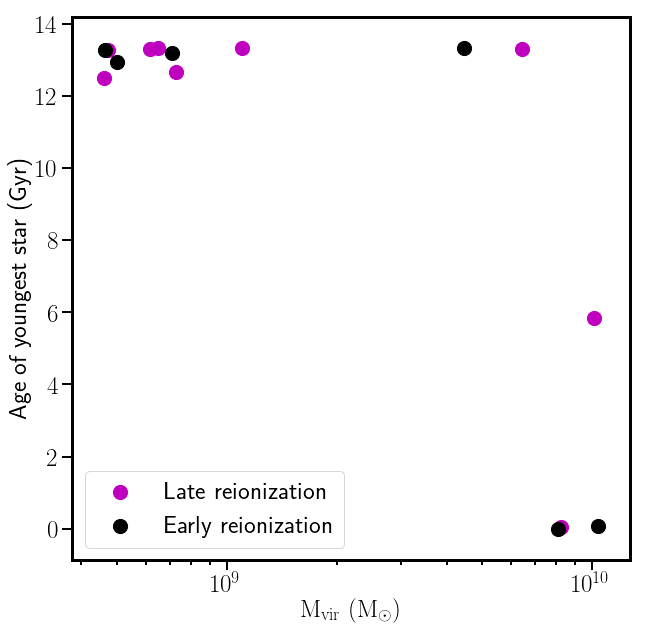

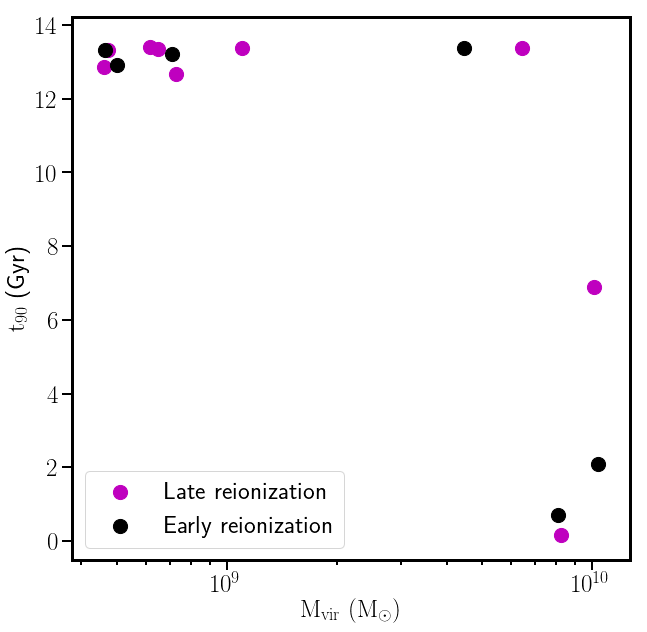

In [47]:
halo_list = ['m10e','m10h','m10a']

reion_mass, reion_youngest_star, reion_t_90 = [],[],[]
fid_mass, fid_youngest_star, fid_t_90 = [],[],[]

for halo_id in halo_list:
    print halo_id
    
    fid_part = pd.read_pickle('../reruns/fg_reion/'+halo_id+'/ahf_part_file_'+halo_id+'_fg_100.pkl')
    fid_halo = pd.read_pickle('../reruns/fg_reion/'+halo_id+'/ahf_halo_file_'+halo_id+'_fg_100.pkl')
    
    reion_part = pd.read_pickle('../reruns/late_fg_6/'+halo_id+'/ahf_part_file_'+halo_id+'_late_100.pkl')
    reion_halo = pd.read_pickle('../reruns/late_fg_6/'+halo_id+'/ahf_halo_file_'+halo_id+'_late_100.pkl')
    
    lbt_bins = np.linspace(0.0,13.7,1000)
    lbt_mod = np.array([(lbt_bins[ii]+lbt_bins[ii+1])/2.0 for ii in range(len(lbt_bins)-1)])
        
    for ii in  range(len(fid_halo['M_vir'].values)):
        halo_mass = fid_halo['M_vir'].iloc[ii]
        halo_vmax = fid_halo['V_max'].iloc[ii]
        key = fid_halo['halo_ids'].iloc[ii]    
        stars_in_halo = fid_part.loc['ages'][str(key)]
        if len(stars_in_halo)>25:
            host_z_fid = 1.0/stars_in_halo - 1.0
            host_t_fid = A_cosmo.age(host_z_fid).value #age (of the univers) when the star particle formed
            host_lbt_fid = np.ones_like(host_t_fid)*A_cosmo.age(0).value - host_t_fid
            fid_mass.append(halo_mass)
            fid_youngest_star.append(np.min(host_lbt_fid))
            
            fid_hist, fid_bins = np.histogram(host_lbt_fid,bins=lbt_bins,normed=True)
            fid_hist_norm = np.cumsum(fid_hist[::-1])[::-1]/np.max(np.cumsum(fid_hist))
            
            tot_diff_90 = abs(fid_hist_norm-0.9)
            
            t_90_fid = lbt_mod[(tot_diff_90==np.min(tot_diff_90))]
            
            fid_t_90.append(np.max(t_90_fid))
            
            
    for ii in  range(len(reion_halo['M_vir'].values)):
        halo_mass = reion_halo['M_vir'].iloc[ii]
        halo_vmax = reion_halo['V_max'].iloc[ii]
        key = reion_halo['halo_ids'].iloc[ii]    
        stars_in_halo = reion_part.loc['ages'][str(key)]
        if len(stars_in_halo)>25:
            host_z_reion = 1.0/stars_in_halo - 1.0
            host_t_reion = A_cosmo.age(host_z_reion).value #age (of the univers) when the star particle formed
            host_lbt_reion = np.ones_like(host_t_reion)*A_cosmo.age(0).value - host_t_reion
            reion_mass.append(halo_mass)
            reion_youngest_star.append(np.min(host_lbt_reion))
            
            reion_hist, reion_bins = np.histogram(host_lbt_reion,bins=lbt_bins,normed=True)
            reion_hist_norm = np.cumsum(reion_hist[::-1])[::-1]/np.max(np.cumsum(reion_hist))
            
            tot_diff_90 = abs(reion_hist_norm-0.9)
            
            t_90_reion = lbt_mod[(tot_diff_90==np.min(tot_diff_90))]
            
            reion_t_90.append(np.max(t_90_reion))

            
print len(reion_mass), len(fid_mass)
fig1 = plt.figure(1,(10,10))
plt.ylabel('Age of youngest star (Gyr)',fontsize=25)
plt.xlabel(r'$\rm M_{vir}$ $\rm (M_{\odot})$',fontsize=25)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.xscale('log')
#plt.xlim([5.0,40.0])
#plt.xlim([13.7,0.0])
plt.scatter(reion_mass,reion_youngest_star,color='m',label='Late reionization',s=200)
plt.scatter(fid_mass,fid_youngest_star,color='k',label='Early reionization',s=200)
#plt.ylim([0.0,1.0])
plt.legend(loc=3,fontsize=25)
#plt.savefig('./paper_figures/youngest_star.png',bbox_inches='tight')
plt.show()

fig2 = plt.figure(2,(10,10))
plt.ylabel(r'$\rm t_{90}$ (Gyr)',fontsize=25)
plt.xlabel(r'$\rm M_{vir}$ $\rm (M_{\odot})$',fontsize=25)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.xscale('log')
#plt.xlim([5.0,40.0])
#plt.xlim([13.7,0.0])
plt.scatter(reion_mass,reion_t_90,color='m',label='Late reionization',s=200)
plt.scatter(fid_mass,fid_t_90,color='k',label='Early reionization',s=200)
#plt.ylim([0.0,1.0])
plt.legend(loc=3,fontsize=25)
#plt.savefig('./paper_figures/t_90.png',bbox_inches='tight')
plt.show()

# Mass formed before z = 6

m10e
m10h
m10a


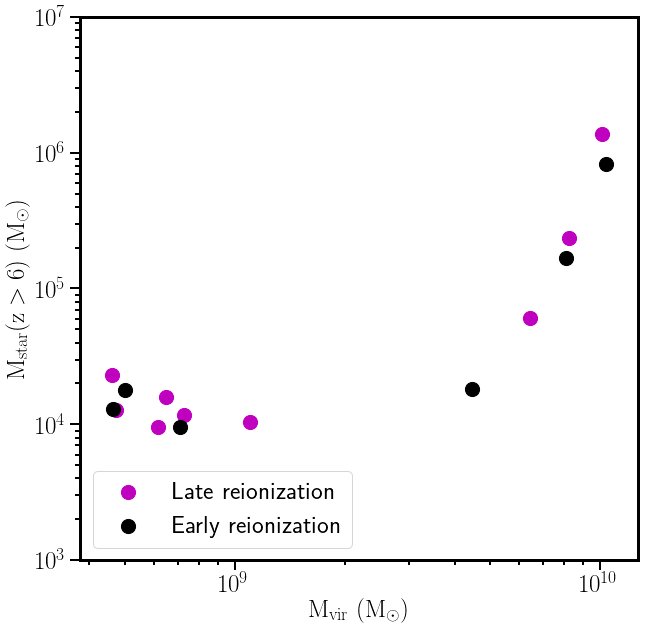

In [49]:
reion_mass, reion_old_mass = [],[]
fid_mass, fid_old_mass = [],[]

t_at_z_six = A_cosmo.age(6.0).value

for halo_id in halo_list:
    print halo_id
    
    fid_part = pd.read_pickle('../reruns/fg_reion/'+halo_id+'/ahf_part_file_'+halo_id+'_fg_100.pkl')
    fid_halo = pd.read_pickle('../reruns/fg_reion/'+halo_id+'/ahf_halo_file_'+halo_id+'_fg_100.pkl')
    
    reion_part = pd.read_pickle('../reruns/late_fg_6/'+halo_id+'/ahf_part_file_'+halo_id+'_late_100.pkl')
    reion_halo = pd.read_pickle('../reruns/late_fg_6/'+halo_id+'/ahf_halo_file_'+halo_id+'_late_100.pkl')

    lbt_bins = np.linspace(0.0,13.7,1000)
    lbt_mod = np.array([(lbt_bins[ii]+lbt_bins[ii+1])/2.0 for ii in range(len(lbt_bins)-1)])
        
    for ii in  range(len(fid_halo['M_vir'].values)):
        halo_mass = fid_halo['M_vir'].iloc[ii]
        halo_vmax = fid_halo['V_max'].iloc[ii]
        key = fid_halo['halo_ids'].iloc[ii]    
        stars_in_halo = fid_part.loc['ages'][str(key)]
        stars_in_halo_mass = fid_part.loc['masses'][str(key)]
        if len(stars_in_halo)>25:
            host_z_fid = 1.0/stars_in_halo - 1.0
            high_z_mask = (host_z_fid>5.0)
            #print np.sum(stars_in_halo_mass[high_z_mask])
            
            fid_mass.append(halo_mass)
            fid_old_mass.append(np.sum(stars_in_halo_mass[high_z_mask]))
        
    for ii in  range(len(reion_halo['M_vir'].values)):
        halo_mass = reion_halo['M_vir'].iloc[ii]
        halo_vmax = reion_halo['V_max'].iloc[ii]
        key = reion_halo['halo_ids'].iloc[ii]    
        stars_in_halo = reion_part.loc['ages'][str(key)]
        stars_in_halo_mass = reion_part.loc['masses'][str(key)]

        if len(stars_in_halo)>25:
            host_z_reion = 1.0/stars_in_halo - 1.0
            high_z_mask = (host_z_reion>5.0)
            
            reion_mass.append(halo_mass)
            reion_old_mass.append(np.sum(stars_in_halo_mass[high_z_mask]))

fig1 = plt.figure(1,(10,10))
plt.ylabel(r'$\rm M_{star}(z>6)$ $\rm (M_{\odot})$',fontsize=25)
plt.xlabel(r'$\rm M_{vir}$ $\rm (M_{\odot})$',fontsize=25)
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.xscale('log')
plt.yscale('log')
#plt.xlim([5.0,40.0])
#plt.xlim([13.7,0.0])
plt.scatter(reion_mass,reion_old_mass,color='m',label='Late reionization',s=200)
plt.scatter(fid_mass,fid_old_mass,color='k',label='Early reionization',s=200)
plt.ylim([1.0e3,1.0e7])
#plt.savefig('./figs/Vmax_fraction.png')
plt.legend(loc=3,fontsize=25)
plt.show()